<h3> LAB 7 - Filtragem digital 2</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
from pylab import *
from scipy.signal import *

<b>1) Considere o sinal x1 uma senoide de baixa frequência e o sinal x2 uma senoide de alta frequência e o sinal x sendo a soma destes dois: <br>
n=0:63; <br>
x1=sin(4\*pi\*n/64); <br>
x2=sin(14\*pi\*n/64); <br>
x=x1 + x2; <br>
x0=[x zeros(1,64)];</b>

In [2]:
n = arange(64)
x1 = sin(4*pi*n/64)
x2 = sin(14*pi*n/64)
x = x1 + x2
x0 = concatenate((x, zeros(64)),axis=None)
w = fftshift(fftfreq(len(n))*2*pi)

<b>2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 (w=pi/4).</b>

In [3]:
# ellip(ordem, max_ripple, min_atenuação, freq_corte)
b,a = ellip(4,0.3,40,0.1)
w_filter, resp_filter = freqz(b,a,w)

<b>3) Visualize o espectro do sinal x e a resposta em frequência do filtro calculado, no mesmo eixo.</b>

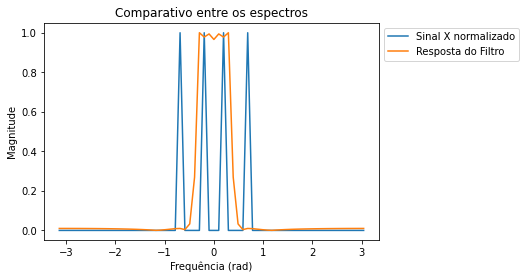

In [4]:
X = fftshift(abs(fft(x)))

plot(w, X/max(X))
plot(w_filter, abs(resp_filter))
legend(['Sinal X normalizado', 'Resposta do Filtro'],
         loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre os espectros")
ylabel ('Magnitude')
xlabel ('Frequência (rad)')
show()

<b>4) filtre o sinal x0 com a função comando filter()</b>

In [5]:
x0_filter = lfilter(b, a, x0);
x0_filter_f = fftshift(fft(x0_filter))

<b>5) filtre o sinal x realizando a convolução com a resposta impulsional do filtro (obtendo sinal com 128 valores)</b>

In [6]:
# Criação da função impz para obter
# resposta impulsional dados os valores de a e b
def impz(b,a,l):
    impulse = zeros(l, dtype=float)
    impulse[0] =1
    response = lfilter(b,a,impulse)
    return response

n_128 = arange(128)
resp_tempo = impz(b,a,int(len(n_128)/2+1))
x_filter_conv = convolve(x, resp_tempo)
x_filter_conv_f = fftshift(fft(x_filter_conv))

<b>6) filtre o sinal x, fazendo produto no domínio da frequência com a resposta em frequência do filtro (com 128 valores)</b>

In [7]:
w_filtro, resposta_filtro = freqz(b,a,128, whole=True)
x_f = fft(x0)
x_filter_prod_f = x_f * resposta_filtro 
x_filter_prod = irfft(x_filter_prod_f,128)

<b>7) plote os 3 resultados no mesmo eixo <br>
   a) No tempo <br></b>

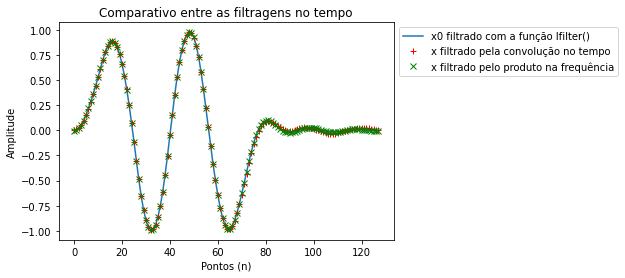

In [8]:
plot(n_128,x0_filter)
plot(n_128,x_filter_conv,'r+')
plot(n_128,x_filter_prod,'gx')
legend(['x0 filtrado com a função lfilter()', 
        'x filtrado pela convolução no tempo', 
        'x filtrado pelo produto na frequência'],
        loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre as filtragens no tempo")
ylabel ('Amplitude')
xlabel ('Pontos (n)')
show()

<b>b) Em frequência</b>

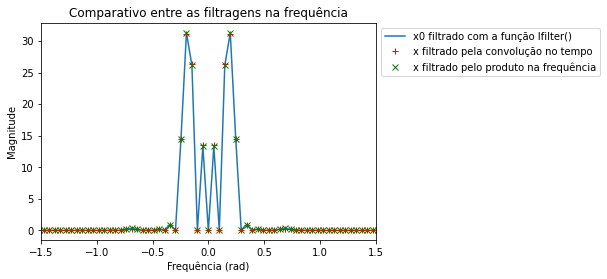

In [9]:
w_plot = fftshift(fftfreq(len(n_128))*2*pi)

plot(w_plot, abs(x0_filter_f))
plot(w_plot, abs(x_filter_conv_f),'r+')
plot(w_plot, fftshift(abs(x_filter_prod_f)),'gx')
legend(['x0 filtrado com a função lfilter()', 
        'x filtrado pela convolução no tempo', 
        'x filtrado pelo produto na frequência'], 
        loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre as filtragens na frequência")
ylabel ('Magnitude')
xlabel ('Frequência (rad)')
# Plot limitado em região com pontos contendo informação
xlim(-1.5,1.5)
show()